## https://tinyurl.com/ANLPTutorial3Part3
Go to "File" -> "Save a Copy in Drive..." This lets you create your own copy of the notebook in your Google drive, and any changes you make doesn't impact the shared notebook

# **TEXT CLUSTERING**

Let's run hierarchical clustering with a toy example of 8 documents

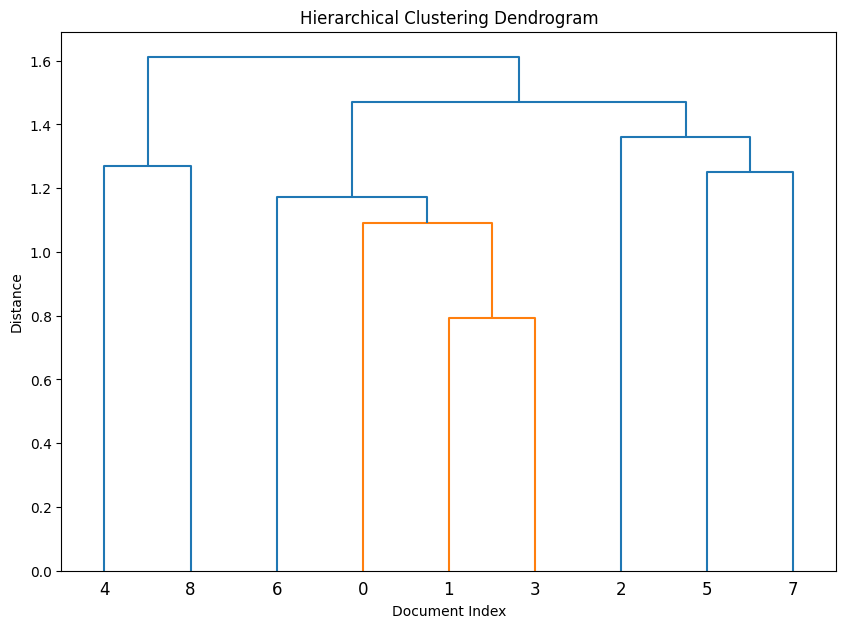

Document 0: Cluster 2
Document 1: Cluster 2
Document 2: Cluster 3
Document 3: Cluster 2
Document 4: Cluster 1
Document 5: Cluster 3
Document 6: Cluster 2
Document 7: Cluster 3
Document 8: Cluster 1


In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning is a part of machine learning",
    "Neural networks are used in deep learning",
    "Artificial intelligence includes machine learning and deep learning",
    "Natural language processing is an application of artificial intelligence",
    "Computer vision uses deep learning techniques",
    "Reinforcement learning is another branch of machine learning",
    "Data science often uses machine learning algorithms",
    "Artificial intelligence is transforming various industries"
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Convert documents to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert sparse matrix to dense array
dense_tfidf_matrix = tfidf_matrix.toarray()

# Perform hierarchical clustering
linkage_matrix = linkage(dense_tfidf_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Document Index')
plt.ylabel('Distance')
plt.show()

# Print cluster assignments
def print_clusters(linkage_matrix, n_clusters):
    from scipy.cluster.hierarchy import fcluster
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    for i, cluster in enumerate(clusters):
        print(f"Document {i}: Cluster {cluster}")
    return clusters

# Choose the number of clusters (you can adjust this)
n_clusters = 3
clusters = print_clusters(linkage_matrix, n_clusters)

Lets analyse the content of each cluster to understand their themes and characteristics.


Cluster 2:
Documents:
- Machine learning is a subset of artificial intelligence
- Deep learning is a part of machine learning
- Artificial intelligence includes machine learning and deep learning
- Reinforcement learning is another branch of machine learning


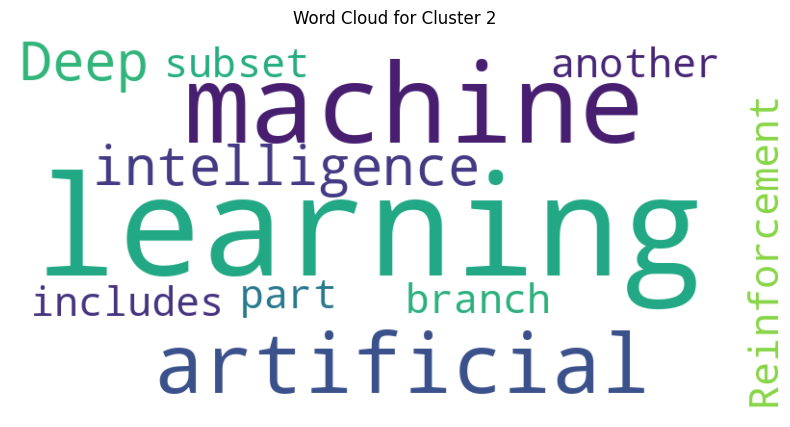


Cluster 3:
Documents:
- Neural networks are used in deep learning
- Computer vision uses deep learning techniques
- Data science often uses machine learning algorithms


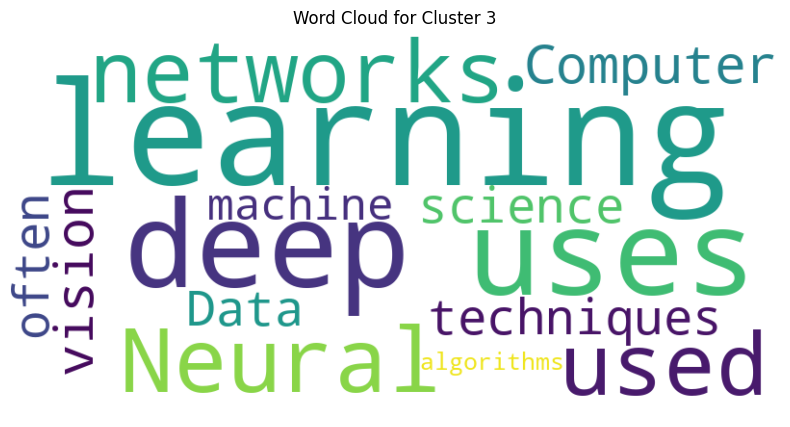


Cluster 1:
Documents:
- Natural language processing is an application of artificial intelligence
- Artificial intelligence is transforming various industries


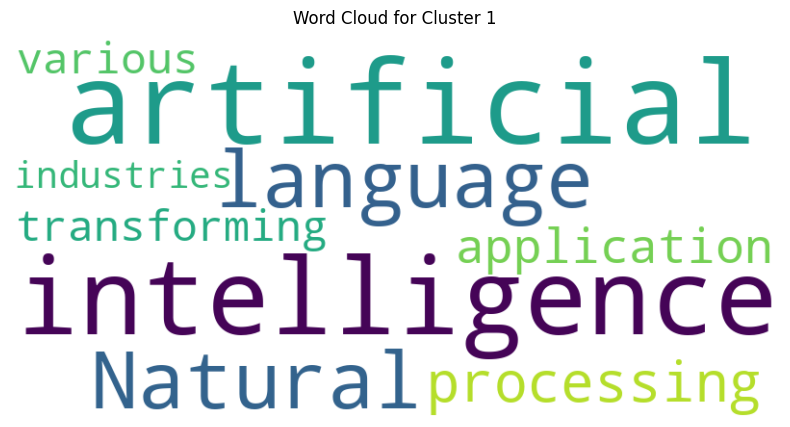

In [2]:
from collections import Counter
from wordcloud import WordCloud

def analyze_clusters(documents, clusters):
    cluster_docs = {}
    for i, cluster in enumerate(clusters):
        if cluster not in cluster_docs:
            cluster_docs[cluster] = []
        cluster_docs[cluster].append(documents[i])

    for cluster, docs in cluster_docs.items():
        print(f"\nCluster {cluster}:")
        print("Documents:")
        for doc in docs:
            print(f"- {doc}")

        # Create a word cloud for each cluster
        text = ' '.join(docs)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

analyze_clusters(documents, clusters)

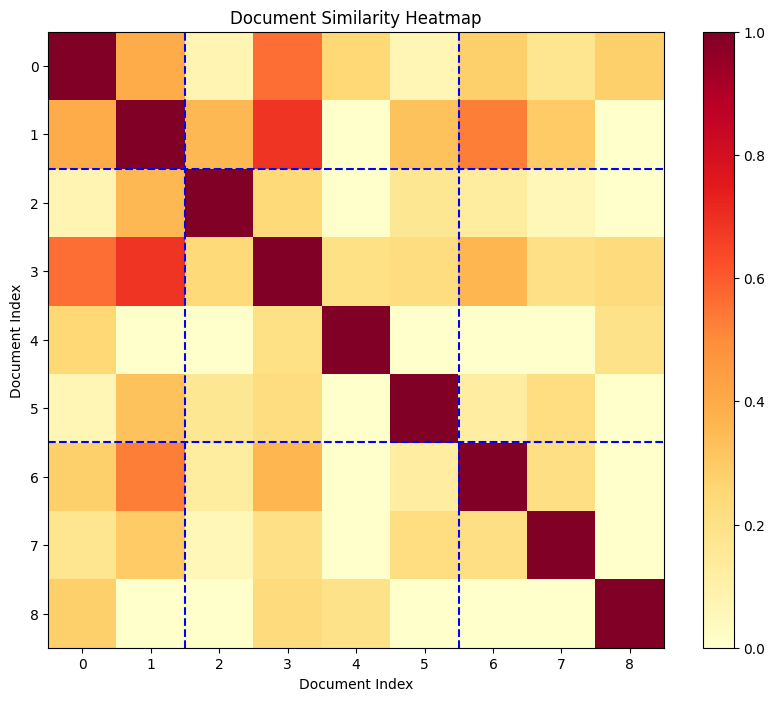

In [3]:
#We can visualize how similar documents are within clusters and how different clusters are from each other


from sklearn.metrics.pairwise import cosine_similarity

def plot_similarity_heatmap(tfidf_matrix, clusters):
    similarity_matrix = cosine_similarity(tfidf_matrix)

    plt.figure(figsize=(10, 8))
    im = plt.imshow(similarity_matrix, cmap='YlOrRd')
    plt.colorbar(im)
    plt.title('Document Similarity Heatmap')
    plt.xlabel('Document Index')
    plt.ylabel('Document Index')

    # Add cluster boundaries
    cluster_boundaries = np.cumsum([list(clusters).count(i) for i in range(1, max(clusters)+1)])
    for boundary in cluster_boundaries[:-1]:
        plt.axhline(y=boundary-0.5, color='blue', linestyle='--')
        plt.axvline(x=boundary-0.5, color='blue', linestyle='--')

    plt.show()

plot_similarity_heatmap(dense_tfidf_matrix, clusters)

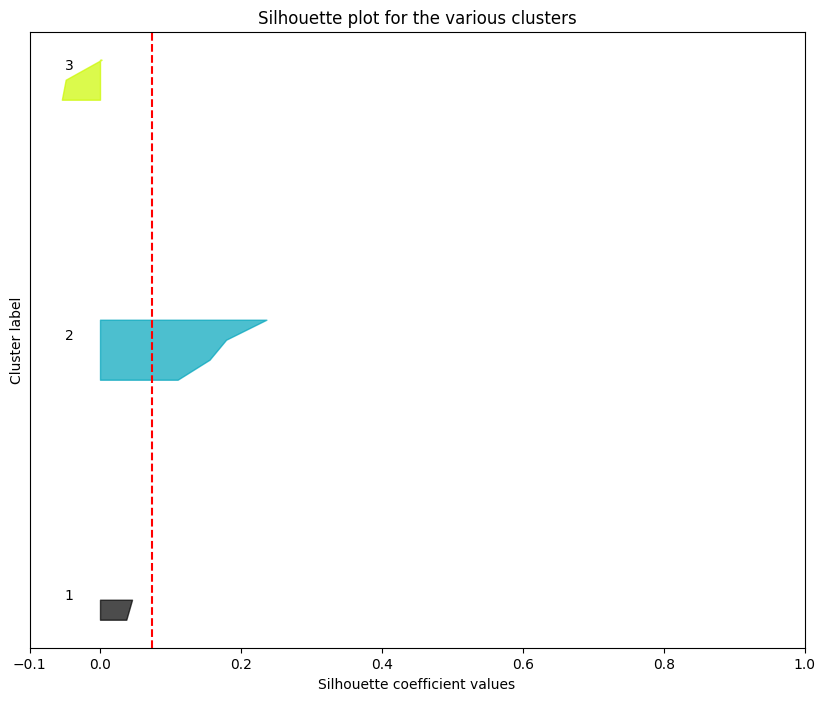

In [4]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_silhouette(X, clusters):
    n_clusters = len(set(clusters))
    silhouette_avg = silhouette_score(X, clusters)
    sample_silhouette_values = silhouette_samples(X, clusters)

    plt.figure(figsize=(10, 8))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i+1]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10

    plt.title("Silhouette plot for the various clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

plot_silhouette(dense_tfidf_matrix, clusters)

# K-means clustering

Next we'll perform text clustering to organize news texts in the 20 newsgroups dataset from SKLearn into groups or clusters based on their content using k-means clustering algorithm.

## **Load Dataset**

In [5]:
from sklearn.datasets import fetch_20newsgroups # Function to download the dataset - this is a large data set which might take a while to load

newsgroup_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Get a subset of the first 1000 samples
newsgroup_data.data = newsgroup_data.data[:1000]


### Convert "Text" data in Dataset into Dataframe

In [6]:
import pandas as pd # Library to manipulate dataframes

df = pd.DataFrame() # Initialize a new dataframe

df['text'] = newsgroup_data.data # Extract the text

df.head() #View the corpus


,text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...


Clean the text by replacing irrelevent information with blank spaces - using regular expressions, we look for specific patterns in the text.

In [7]:
import re # Package to use regular expressions

# Define a function to clean the input text
def clean(text):
    text = re.sub(r'\S*@\S*\s?', '', text) # Remove email ids
    text = re.sub(r'\s+', ' ', text) # Remove newline (\n)
    text = re.sub(r"\'", "", text) # Remove quotes
    # Remove the header metadata
    text = re.sub(r"(From:).*(Lines: )\d*?( )", "", text)
    return text


df['text'] = df['text'].apply(clean) # Apply function to all the rows
df.head()

,text
0,NNTP-Posting-Host: po4.andrew.cmu.edu I am sur...
1,My brother is in the market for a high-perform...
2,Nntp-Posting-Host: viktoria.dsv.su.se Reply-To...
3,In article (Wayne Smith) writes: > In article ...
4,NNTP-Posting-Host: po4.andrew.cmu.edu 1) I hav...


### Stopword Removal

In [8]:
# Import the necessary libraries

import nltk # Text processing library that provides provides utility functions
nltk.download('stopwords') # Download the nltk's stopword module
from nltk.corpus import stopwords # Import the stopword module

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Function to remove stopwords
def remove_stopword(text):
    tokens = []
    stop_words = stopwords.words("english") # Obtain a set of english stopwords

    for token in text.split(): # Iterate over each word in the text
        if token not in stop_words: # Check is the word is not a stopword
            tokens.append(token) # Append to the token list

    return " ".join(tokens) # Join the tokens (with a " " as the seperator)

In [10]:
# Apply the function to the text column
df["text"] = df["text"].apply(remove_stopword)
df.head()

,text
0,NNTP-Posting-Host: po4.andrew.cmu.edu I sure b...
1,My brother market high-performance video card ...
2,Nntp-Posting-Host: viktoria.dsv.su.se Reply-To...
3,In article (Wayne Smith) writes: > In article ...
4,NNTP-Posting-Host: po4.andrew.cmu.edu 1) I old...


### Stemming

In [11]:
# Import the necessary libraries
from nltk.stem import SnowballStemmer # Import the stemmer module from nltk

In [12]:
# Function to perform stemming
def stem_words(text):
    tokens = []
    english_stemmer = SnowballStemmer("english") # Load the stemmer object

    for token in text.split(): # Iterate over each word in the text
        token = english_stemmer.stem(token) # Stem the word
        tokens.append(token) # Append to the token list

    return " ".join(tokens) # Join the tokens (with a " " as the seperator)

In [13]:
# Apply the function to the text column
df["text"] = df["text"].apply(stem_words)
df.head()

,text
0,nntp-posting-host: po4.andrew.cmu.edu i sure b...
1,my brother market high-perform video card supp...
2,nntp-posting-host: viktoria.dsv.su.s reply-to:...
3,in articl (wayn smith) writes: > in articl (ri...
4,nntp-posting-host: po4.andrew.cmu.edu 1) i old...


### Remove Empty Texts

In [14]:
# Import the necessary libraries
import numpy as np # Used to manipulate and perform calculations on arrays/matrices

In [15]:
# Train dataset
df["text"].replace("", np.nan, inplace=True) # Replace empty strings with NaN
df.dropna(subset=["text"], inplace=True) # Drop the NaNs from the text column
df.reset_index(inplace=True) # Reset the indexes
df.drop("index", axis="columns", inplace=True) # Drop the old index column


## **Text Representation**

Input text should be represented in a numerical format for the machine to understand it, so our first step in feature engineering is to represent the text in another format.

There are many ways we can represent text data to apply machine learning:
1. Bag of Words (BoW): Represents text as a collection of individual words, ignoring grammar and word order
2. Term Frequency-Inverse Document Frequency (TF-IDF): Represents the importance of each word in the document and the corpus as a whole, based on its frequency in the document and its rarity in the corpus
3. Word Embeddings: Represents words as dense vectors in a high-dimensional space, where words with similar meanings are clustered together
4. Character-level Embeddings: Represents text at the character level, rather than the word level, using vectors to represent each character
5. Convolutional Neural Networks (CNNs): Learns features from text by applying convolutional filters to the text representation
6. Recurrent Neural Networks (RNNs): Models sequences of text, such as sentences or paragraphs, and can capture dependencies between words in a sentence
7. Transformer-based Models: Capture context and dependencies between words in a sentence using the attention mechanism

Here we shall make us of one of the more simpler and popular techniques: **TF-IDF**

In [16]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [17]:
vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
X = vectorizer.fit_transform(df['text']) # Fit the vectorizer on the entire data

In [18]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 21884


This means that there are 21884 unique tokens in our data set

In [19]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
nntp => 13981
posting => 15452
host => 10075
po4 => 15329
andrew => 2895


## **Identify Number of Clusters**

To identify the optimal number of clusters, we can use methods like the Elbow Method and the Silhouette Method. These methods help determine the number of clusters that best fit the data by evaluating the clustering performance for different values of
𝑘

In [20]:
#Import required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [21]:
# Function to plot the Elbow Method
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 10)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

In [22]:
# Function to plot the Silhouette Method
def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 10)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


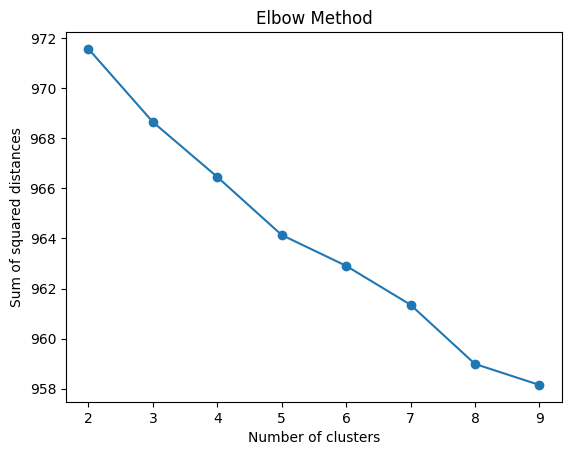

In [23]:
# Plot Elbow Method
plot_elbow_method(X)

Look for the "elbow point" in the plot, where the Sum of Squared Distances (SSD) starts to decrease more slowly. This point suggests a balance between the number of clusters and the compactness of the clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

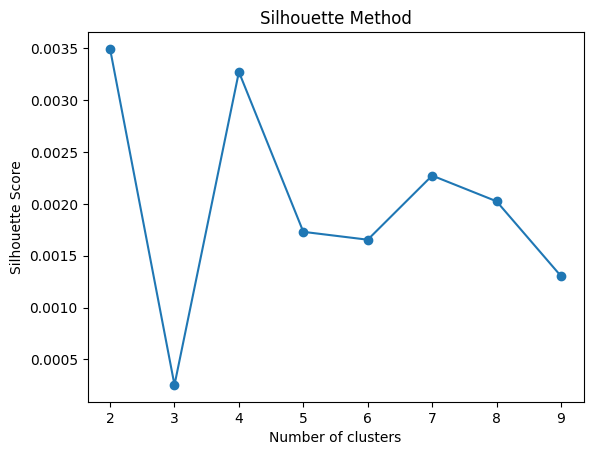

In [24]:
# Plot Silhouette Method
plot_silhouette_method(X)

Look for the peak in the plot, where the silhouette score is maximized. This point suggests the best separation between clusters.

In [28]:
# Based on the plots, choose the optimal number of clusters
num_clusters = 4

## **Clustering Model** - K-means

In [25]:
# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

NameError: name 'num_clusters' is not defined

In [26]:
# Get the cluster labels
labels = kmeans.labels_
print(labels)

NameError: name 'kmeans' is not defined

In [27]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


NameError: name 'labels' is not defined

In [ ]:
# Create a DataFrame to display the results
clustered_docs = pd.DataFrame({'Document': df['text'], 'Cluster': labels})

In [ ]:
# Display a few documents from each cluster
for i in range(num_clusters):
    print(f"\nCluster {i} documents:")
    print(clustered_docs[clustered_docs['Cluster'] == i].head(3))  # Display first 3 documents in each cluster


Cluster 0 documents:
                                             Document  Cluster
4   nntp-posting-host: po4.andrew.cmu.edu 1) i old...        0
5   nntp-posting-host: rukbat.cs.unc.edu in articl...        0
21  in articl (mike hoswell) writes: |> |> im quit...        0

Cluster 1 documents:
                                             Document  Cluster
1   my brother market high-perform video card supp...        1
3   in articl (wayn smith) writes: > in articl (ri...        1
16  distribution: world nntp-posting-host: clover....        1

Cluster 2 documents:
                                            Document  Cluster
2  nntp-posting-host: viktoria.dsv.su.s reply-to:...        2
8  in articl (valeri s. hammerl) writes: >>[...] ...        2
9  in articl (darius_lecointe) writes: >>jesus je...        2

Cluster 3 documents:
                                            Document  Cluster
0  nntp-posting-host: po4.andrew.cmu.edu i sure b...        3
6  nntp-posting-host: tamuts.tamu.ed

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


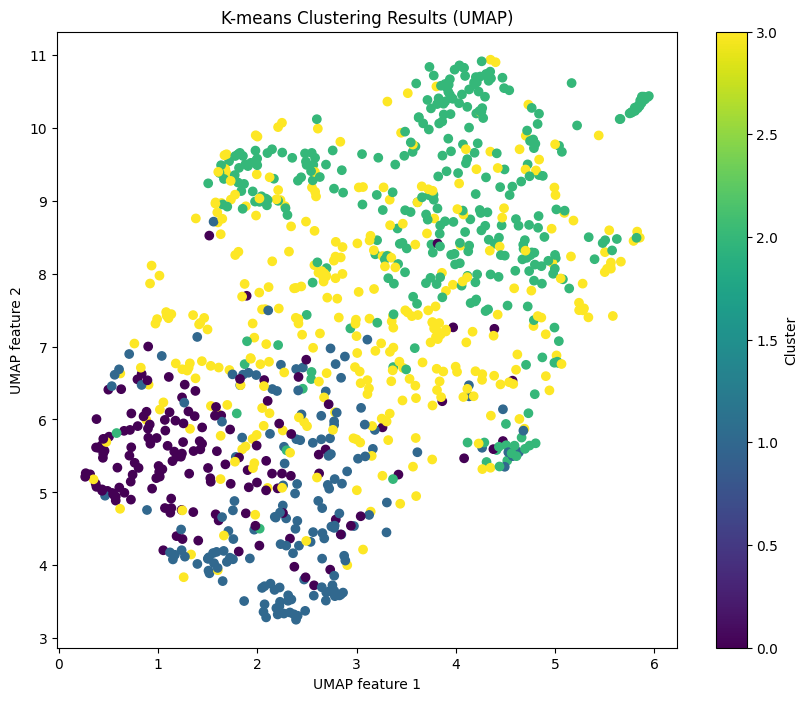

In [ ]:
#!pip install umap-learn
from umap import UMAP

# Reduce dimensionality using UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results (UMAP)')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()